# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

# Detalhes inicias do dados

<H1>Detalhes da base de dados<H1>

* Base de dados: <https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset>


    
* Cálculo de sálario: <https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary> e <https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary>


    
* Stock: <https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20are@20granted@20to,a%20specific%20period%20of%20time>

In [2]:
employee_df = pd.read_csv("Human_Resources.csv")

In [3]:
employee_df.shape

(1470, 35)

In [4]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Análise Exploratória de Dados

In [7]:
employee_df["Attrition"] = employee_df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

In [8]:
employee_df["OverTime"] = employee_df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

In [9]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


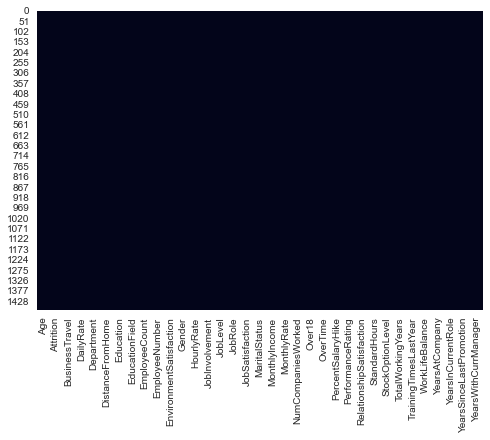

In [10]:
#Visualização de valores nulos via gráfico
sns.heatmap(employee_df.isnull(), cbar= False);

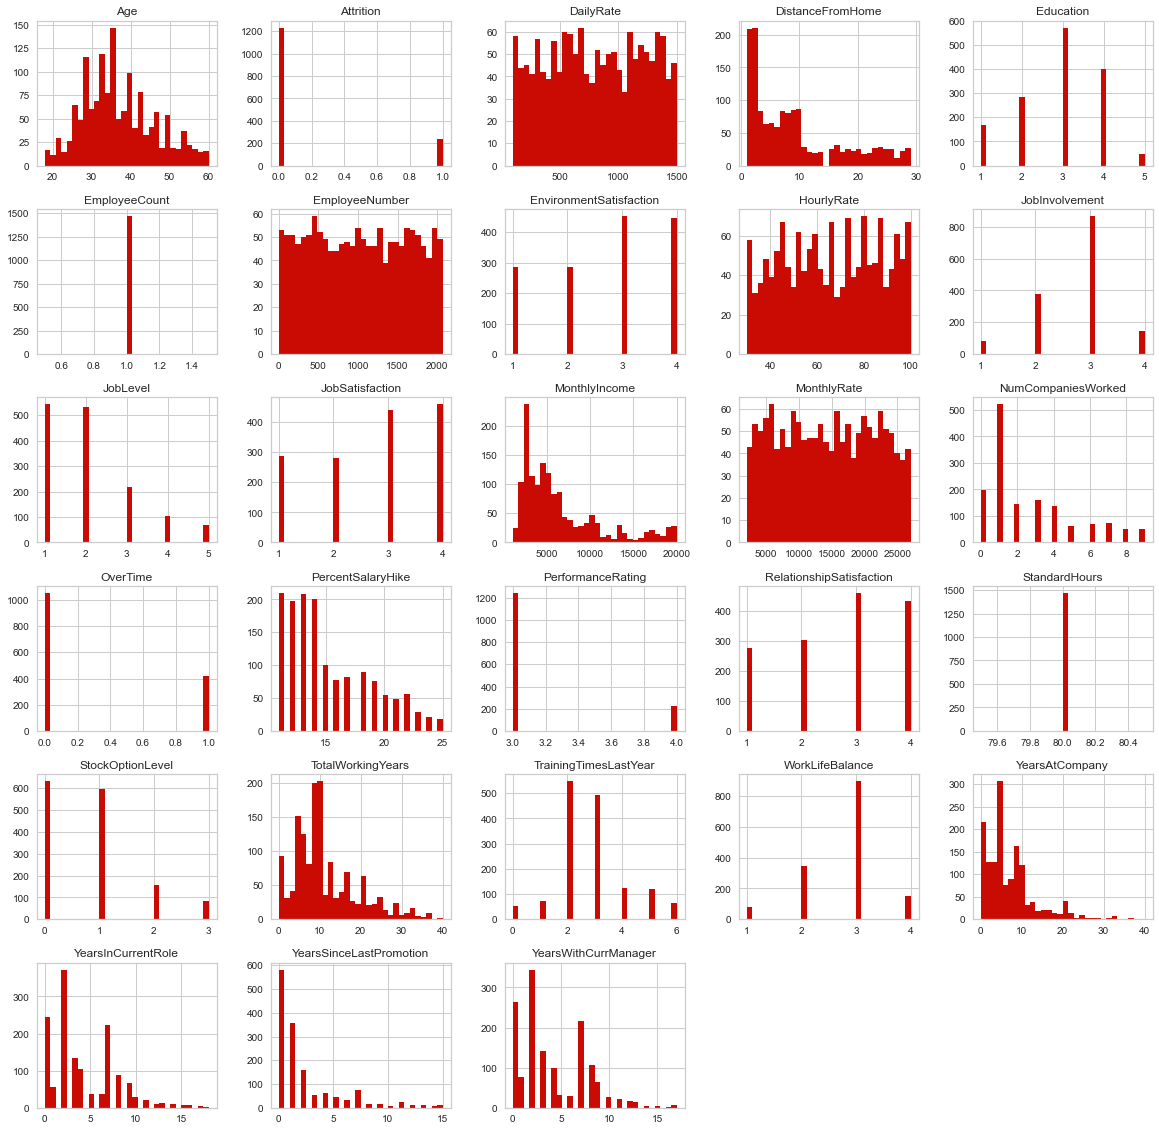

In [11]:
employee_df.hist(bins = 30, figsize= (20, 20), color= "r");

In [12]:
#Apagando informações desnecessárias
employee_df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis= 1, inplace= True)

In [13]:
#Confirmando o drop
employee_df.shape

(1470, 31)

In [14]:
#Criando 2 sub set
left_df = employee_df[employee_df["Attrition"] == 1]
stayed_df = employee_df[employee_df["Attrition"] == 0]

In [15]:
#Visualizando dados e sub set
print("Total = ", len(employee_df))
print("Funcionários que saíram da empresa = ", len(left_df))
print("Funcionários que saíram da empresa = ", len(left_df) / len(employee_df) * 100, "%") 
print("Funcionários que ficaram na empresa = ", len(stayed_df))
print("Funcionários que ficaram na empresa = ", len(stayed_df) / len(employee_df) * 100, "%") 

Total =  1470
Funcionários que saíram da empresa =  237
Funcionários que saíram da empresa =  16.122448979591837 %
Funcionários que ficaram na empresa =  1233
Funcionários que ficaram na empresa =  83.87755102040816 %


In [16]:
#Estatística dos funcionários que saíram da empresa
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
#Estatística dos funcionários que ficaram na empresa
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


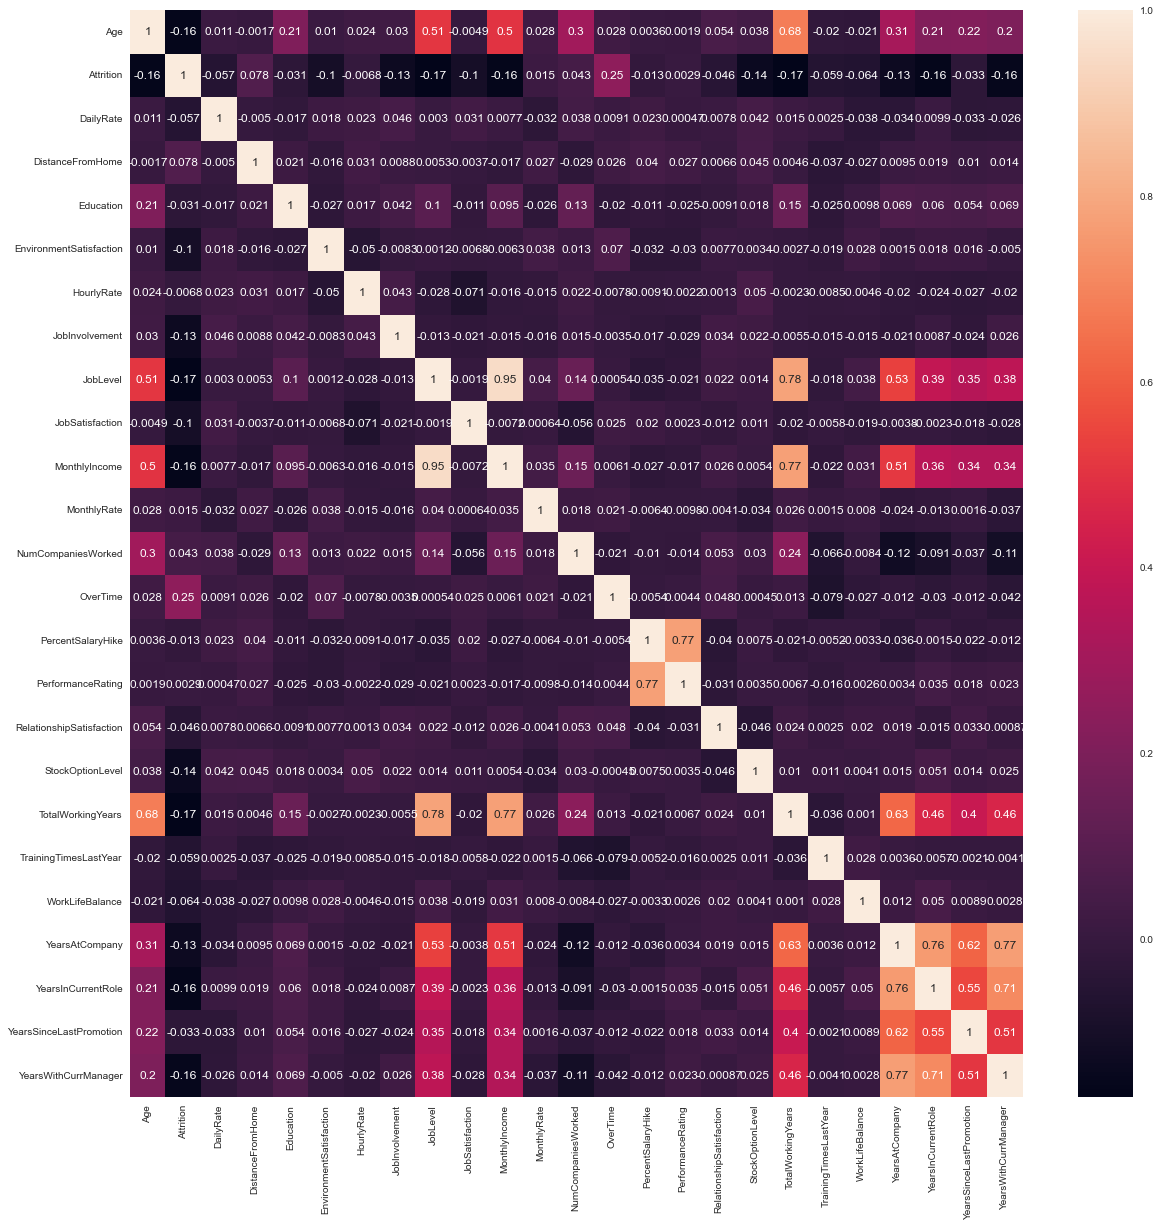

In [18]:
#Gerando correlações
correlaations = employee_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlaations, annot= True);

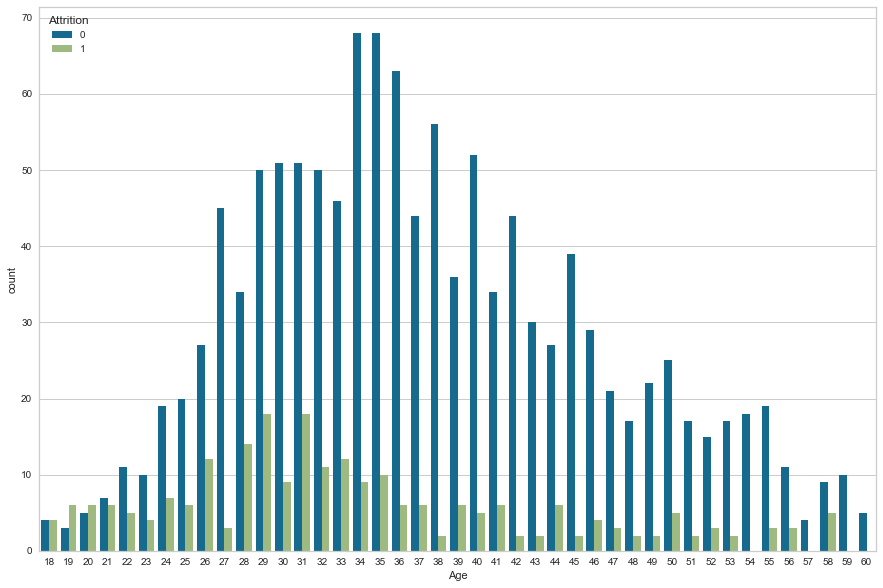

In [19]:
plt.figure(figsize= (15, 10))
sns.countplot(x = "Age", hue = "Attrition", data=  employee_df);

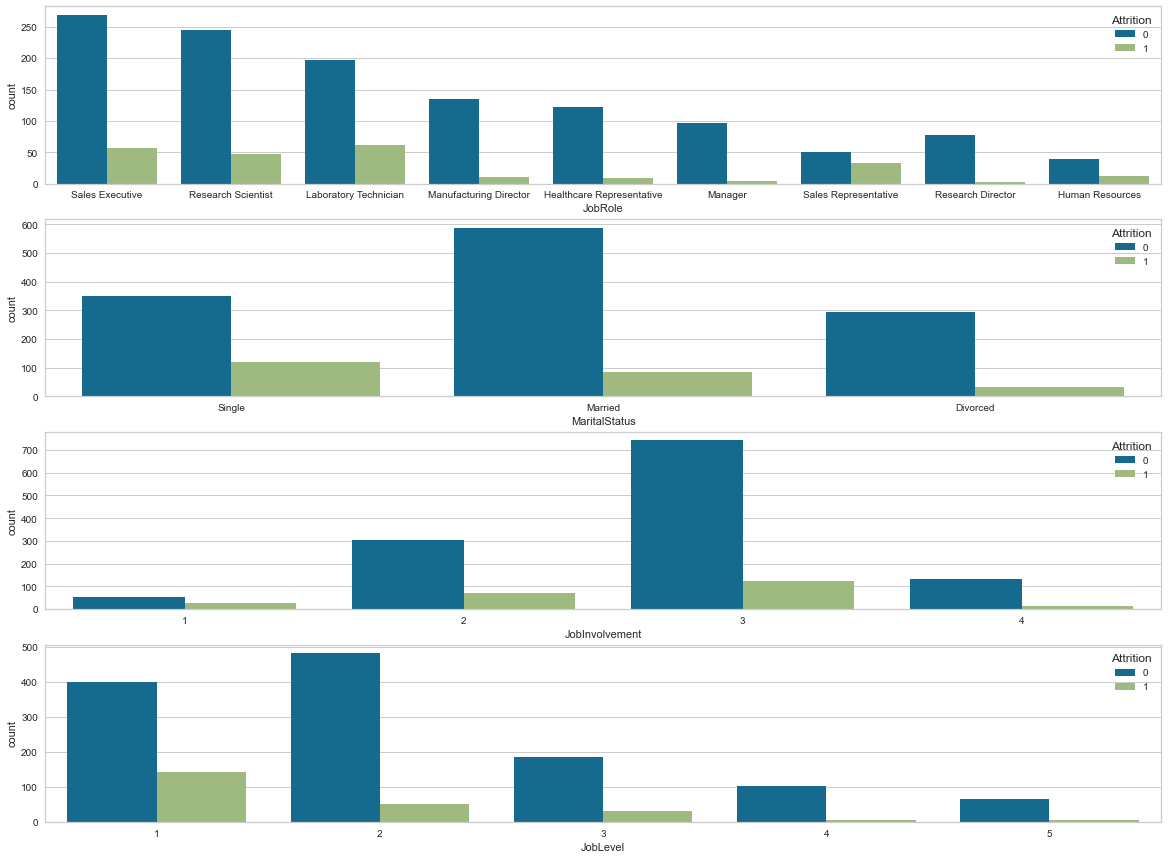

In [20]:
plt.figure(figsize= (20, 15))
plt.subplot(411)
sns.countplot(x= "JobRole", hue= "Attrition", data= employee_df);
plt.subplot(412)
sns.countplot(x= "MaritalStatus", hue= "Attrition", data= employee_df);
plt.subplot(413)
sns.countplot(x= "JobInvolvement", hue= "Attrition", data= employee_df);
plt.subplot(414)
sns.countplot(x= "JobLevel", hue= "Attrition", data= employee_df);

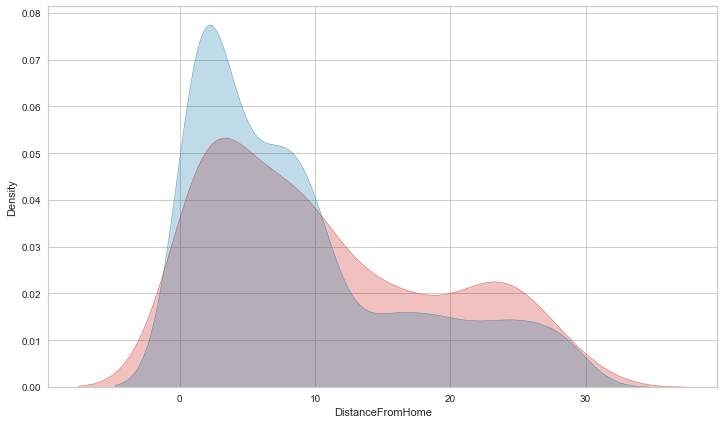

In [21]:
#KDE (Kernel Density Estimate)
plt.figure(figsize= (12, 7))
sns.kdeplot(left_df["DistanceFromHome"], label = "Funcionários que saíram", shade= True, color= "r");
sns.kdeplot(stayed_df["DistanceFromHome"], label = "Funcionários que ficaram", shade= True, color= "b");

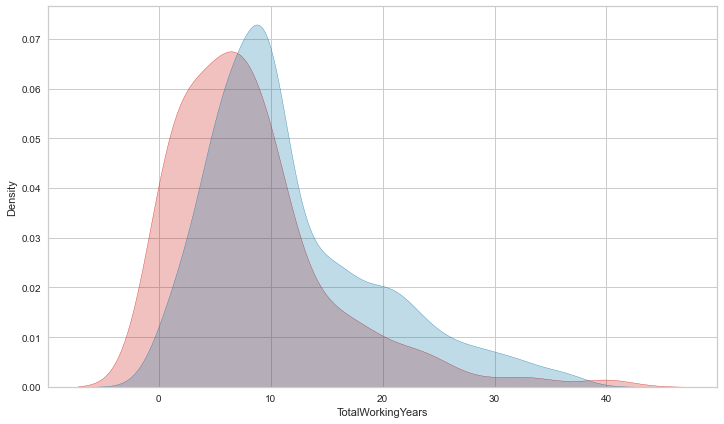

In [22]:
#KDE (Kernel Density Estimate)
plt.figure(figsize= (12, 7))
sns.kdeplot(left_df["TotalWorkingYears"], label = "Funcionários que saíram", shade= True, color= "r");
sns.kdeplot(stayed_df["TotalWorkingYears"], label = "Funcionários que ficaram", shade= True, color= "b");

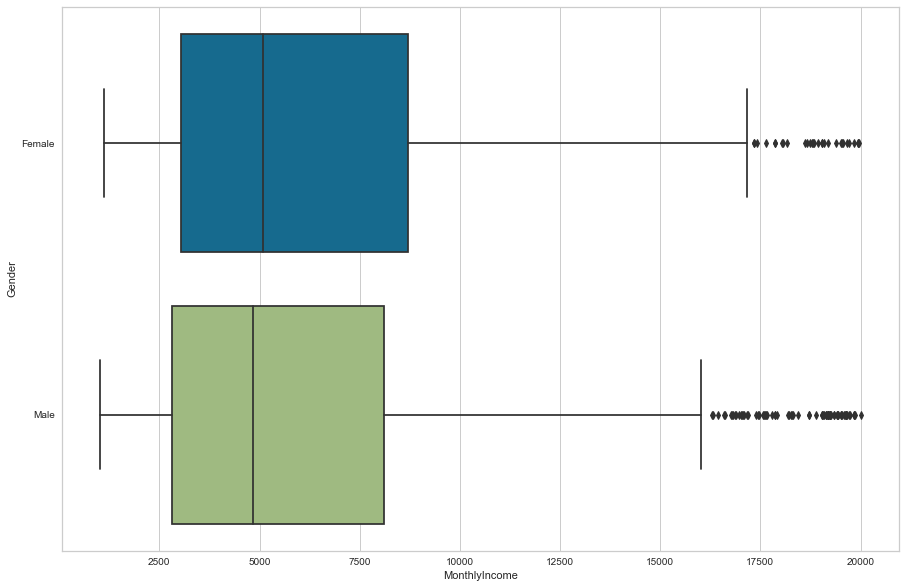

In [23]:
plt.figure(figsize= (15, 10))
sns.boxplot(x= "MonthlyIncome", y= "Gender", data= employee_df);

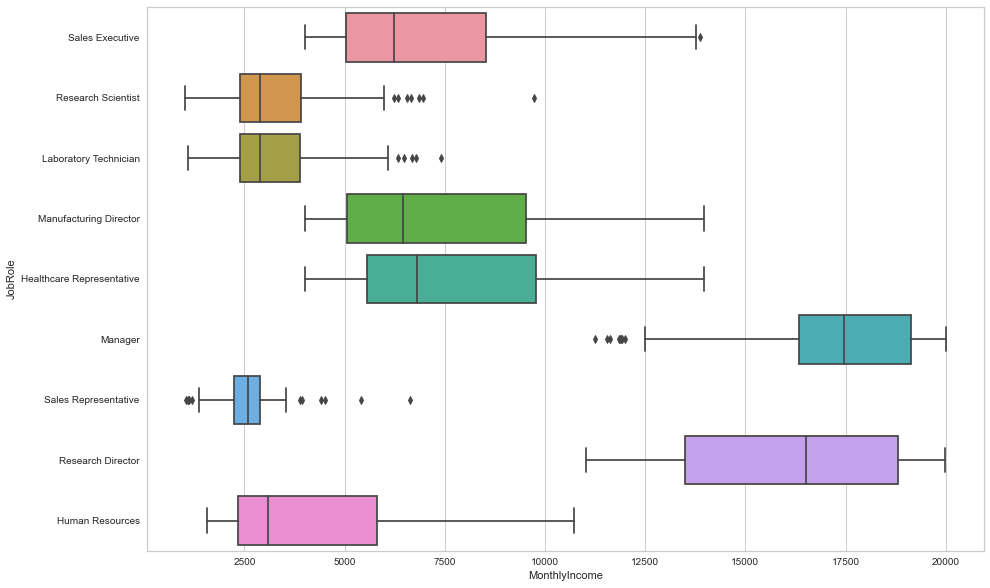

In [24]:
plt.figure(figsize= (15, 10))
sns.boxplot(x = "MonthlyIncome", y = "JobRole", data = employee_df);

# Pré Processamento de Dados e Treinamento

In [25]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [26]:
#Separando dados categoricos
x_cat = employee_df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]]
x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [27]:
#Gerando instância e aplicando transformação
one_hot = OneHotEncoder()
x_cat = one_hot.fit_transform(x_cat).toarray()

In [28]:
#Transformando para data frame
x_cat = pd.DataFrame(x_cat)

In [29]:
#Separando dados numéricos
x_numerical = employee_df[["Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction",
                           "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome",
                           "MonthlyRate", "NumCompaniesWorked", "OverTime", "PercentSalaryHike", 
                           "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", 
                           "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", 
                           "YearsSinceLastPromotion", "YearsWithCurrManager"]]

In [30]:
x_numerical.shape

(1470, 24)

In [31]:
#Juntando as variáveis x
x_all = pd.concat([x_cat, x_numerical], axis= 1 )
x_all.shape

(1470, 50)

In [32]:
#Gerando instância e aplicando escala
scale = MinMaxScaler()
x = scale.fit_transform(x_all)

C:\Users\Fred\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Fred\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [33]:
y = employee_df["Attrition"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [35]:
#Visualziando tamanho dos dados de treinamento
x_train.shape, y_train.shape

((1176, 50), (1176,))

In [36]:
#Visualizando tamanho dos dados de testes
x_test.shape, y_test.shape

((294, 50), (294,))

# Regressão Logística

In [50]:
#Gerando instância do modelo
logistic = LogisticRegression(C=1, solver= "lbfgs", tol= 0.0001)
#{'C': 1, 'solver': 'lbfgs', 'tol': 0.0001}

In [51]:
#Treinando modelo
logistic.fit(x_train, y_train)

LogisticRegression(C=1)

In [52]:
#Gerando previsões
predict_logistic = logistic.predict(x_test)

In [53]:
#Visualizando as previsões
accuracy_score(y_test, predict_logistic)

0.8503401360544217

0.8503401360544217

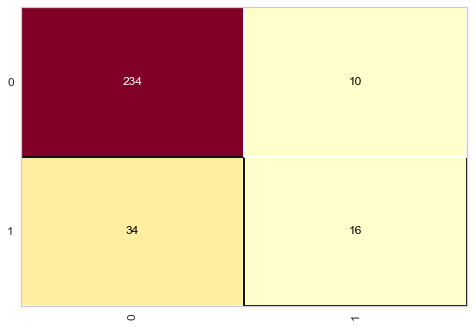

In [54]:
#Gerando matriz de confusão
cm = ConfusionMatrix(logistic)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [55]:
#Classification Report
print(classification_report(y_test, predict_logistic))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       244
           1       0.62      0.32      0.42        50

    accuracy                           0.85       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.83      0.85      0.83       294



# Random Forest

In [ ]:
#Gerando instância do modelo
random = RandomForestClassifier()

In [ ]:
#Treinando modelo
random.fit(x_train, y_train)

In [ ]:
#Gerando previsões
predict_random = random.predict(x_test)

In [ ]:
#Visualizando previsões
accuracy_score(y_test, predict_random)

In [ ]:
#Gerando matriz de confusão
cm = ConfusionMatrix(random)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
#Classification Report
print(classification_report(y_test, predict_random))

# Redes Neurais

In [ ]:
#Gerando instância do modelo
rn = MLPClassifier()

In [ ]:
rn.fit(x_train, y_train)

In [ ]:
predict_rn = rn.predict(x_test)

In [ ]:
accuracy_score(y_test, predict_rn)

In [ ]:
cm = ConfusionMatrix(rn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
print(classification_report(y_test, predict_rn))

# Salvando Modelo

In [58]:
#Salvando modelo e variáveis já treinadas para utilização no futuro
with open("variables_model.pkl", "wb") as f:
    pickle.dump([scale, one_hot, logistic], f)